In [1]:
#!pip install xlrd>=2.0.1
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics
from scipy.stats import shapiro
from sklearn.decomposition import PCA

In [2]:

file_path1 = "data/GCB2022v27_MtCO2_flat.csv"
file_path2 = "data/GCB2022v27_percapita_flat.csv"
co2mt_df = pd.read_csv(file_path1)
co2pc_df = pd.read_csv(file_path2)

In [3]:
co2mt_df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [4]:
co2mt_df.shape

(63104, 11)

In [5]:
co2pc_df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
dtype: object

In [6]:
# Check for missing values
print(co2mt_df.isnull().sum())

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64


In [7]:
co2mt_df.drop(['Other'], axis=1, inplace=True)

In [8]:
# Drop rows with missing values
co2mt_df = co2mt_df.dropna()

In [9]:
# Check for missing values
print(co2mt_df.isnull().sum())

Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Per Capita            0
dtype: int64


In [10]:
# Descriptive statistics
co2mt_df.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
count,15314.000000,15314.000000,15314.000000,15314.000000,15314.000000,15314.000000,15314.000000,15314.000000
mean,1984.221888,202.657059,86.320228,73.989131,32.861484,5.821256,2.408357,5.265471
std,23.776534,1647.525411,689.345313,614.430171,293.688084,58.559642,19.799437,19.286770
min,1846.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,0.575248,0.000000,0.421360,0.000000,0.000000,0.000000,0.429324
50%,1986.000000,5.201431,0.100685,2.439166,0.000000,0.153839,0.000000,1.966587
75%,2004.000000,39.659489,6.916677,16.125264,2.904756,1.125173,0.004714,6.165228
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,834.192642


In [11]:
co2mt_df.shape

(15314, 10)

In [12]:
co2mt_df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
200,Afghanistan,AFG,1950,0.084272,0.021068,0.063204,0.0,0.0,0.0,0.011266
201,Afghanistan,AFG,1951,0.091600,0.025648,0.065952,0.0,0.0,0.0,0.012098
202,Afghanistan,AFG,1952,0.091600,0.031708,0.059892,0.0,0.0,0.0,0.011946
203,Afghanistan,AFG,1953,0.106256,0.037949,0.068307,0.0,0.0,0.0,0.013685
204,Afghanistan,AFG,1954,0.106256,0.042502,0.063754,0.0,0.0,0.0,0.013511


In [13]:
# Display the column titles
column_titles = co2mt_df.columns
print("Column Titles:", column_titles)

Column Titles: Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Per Capita'],
      dtype='object')


In [14]:
global_percapita_per_year = co2mt_df.groupby('Year')['Per Capita'].sum().reset_index()

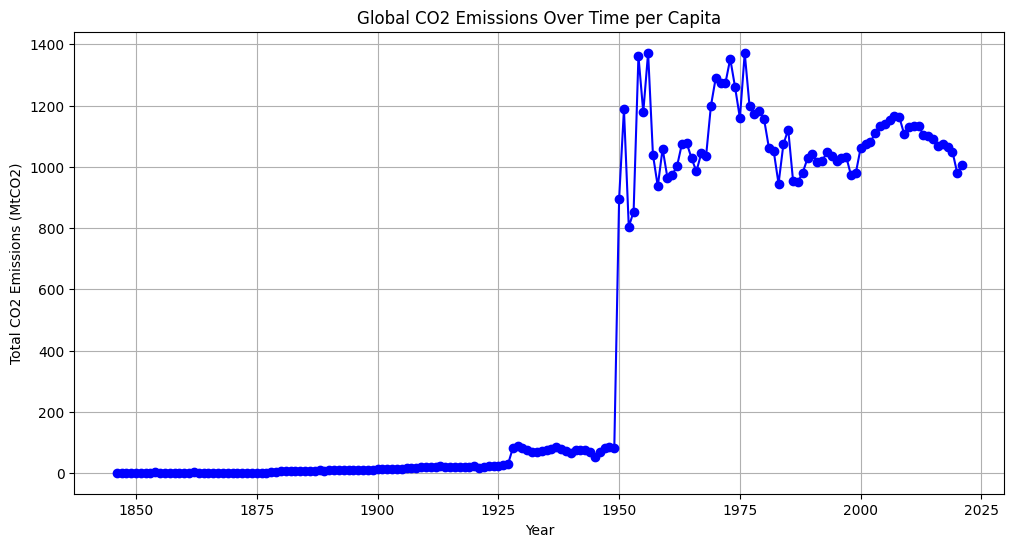

In [15]:
# Visualize CO2 emissions over time
plt.figure(figsize=(12, 6))
plt.plot(global_percapita_per_year['Year'], global_percapita_per_year['Per Capita'], marker='o', linestyle='-', color='b')
plt.title('Global CO2 Emissions Over Time per Capita')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.grid(True)
plt.show()

In [16]:
co2pc_df.shape

(63104, 10)

In [17]:
# Check for missing values
print(co2pc_df.isnull().sum())

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                 44132
Coal                  45966
Oil                   46065
Gas                   46092
Cement                47656
Flaring               46160
Other                 61484
dtype: int64


In [18]:
co2pc_df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
co2pc_df.drop(['Other'], axis=1, inplace=True)

In [20]:
# Drop rows with missing values
co2pc_df = co2pc_df.dropna()

In [21]:
co2pc_df.shape

(15225, 9)

In [22]:
# Explore basic statistics
print(co2pc_df.describe())

               Year         Total          Coal           Oil           Gas  \
count  15225.000000  15225.000000  15225.000000  15225.000000  15225.000000   
mean    1984.275008      5.296249      1.078314      3.131641      0.751549   
std       23.809678     19.338848      2.460549     18.573277      2.827057   
min     1846.000000      0.000000      0.000000      0.000000      0.000000   
25%     1967.000000      0.443360      0.000000      0.231694      0.000000   
50%     1986.000000      1.993726      0.018005      0.992247      0.000000   
75%     2004.000000      6.193007      0.973181      2.963874      0.293524   
max     2021.000000    834.192642     34.229584    834.192642     53.311980   

             Cement       Flaring  
count  15225.000000  15225.000000  
mean       0.084394      0.241102  
std        0.141153      2.910253  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.027177      0.000000  
75%        0.121430      0.000620  


In [23]:
# Display the column titles
column_titles = co2pc_df.columns
print("Column Titles:", column_titles)

Column Titles: Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring'],
      dtype='object')


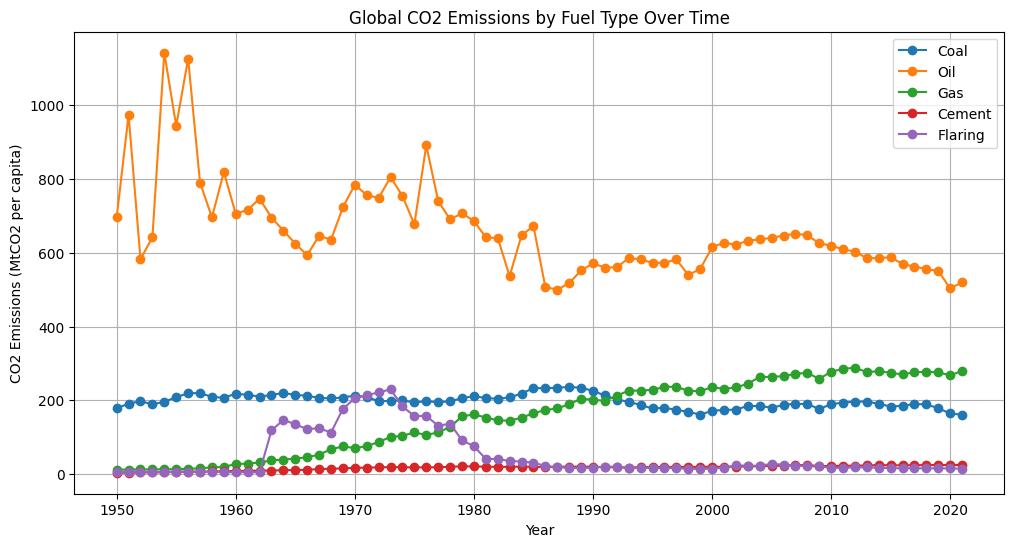

In [24]:
#Filtered to year 1950 to look a bit more normal as not every country has data from <1950
co2pc_df_filtered = co2pc_df[co2pc_df['Year'] >= 1950]


# Aggregate emissions by fuel type for each year
fuel_totals_per_year = co2pc_df_filtered.groupby('Year').sum().reset_index()

# Now you can plot this aggregated data
plt.figure(figsize=(12, 6))
plt.plot(fuel_totals_per_year['Year'], fuel_totals_per_year['Coal'], label='Coal', marker='o')
plt.plot(fuel_totals_per_year['Year'], fuel_totals_per_year['Oil'], label='Oil', marker='o')
plt.plot(fuel_totals_per_year['Year'], fuel_totals_per_year['Gas'], label='Gas', marker='o')
plt.plot(fuel_totals_per_year['Year'], fuel_totals_per_year['Cement'], label='Cement', marker='o')
plt.plot(fuel_totals_per_year['Year'], fuel_totals_per_year['Flaring'], label='Flaring', marker='o')
plt.title('Global CO2 Emissions by Fuel Type Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2 per capita)')
plt.legend()
plt.grid(True)
plt.show()


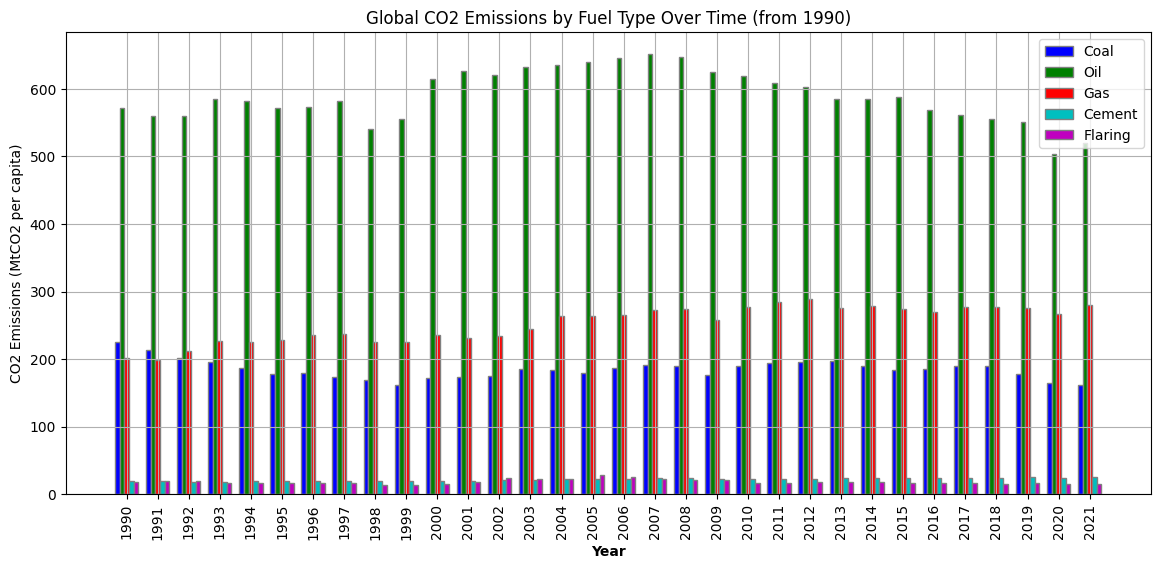

In [25]:
# Filter the dataset for years >= 1990
co2pc_df_filtered = co2pc_df[co2pc_df['Year'] >= 1990]

# Aggregate emissions by fuel type for each year, after filtering
fuel_totals_per_year = co2pc_df_filtered.groupby('Year').sum().reset_index()

# Prepare the bar positions
barWidth = 0.15  # A narrower bar width may work better for clarity with many years
r1 = np.arange(len(fuel_totals_per_year['Year']))

# Set up the figure size and bar positions
plt.figure(figsize=(14, 6))

# Create bars for each fuel type
plt.bar(r1, fuel_totals_per_year['Coal'], color='b', width=barWidth, edgecolor='grey', label='Coal')
plt.bar(r1 + barWidth, fuel_totals_per_year['Oil'], color='g', width=barWidth, edgecolor='grey', label='Oil')
plt.bar(r1 + 2 * barWidth, fuel_totals_per_year['Gas'], color='r', width=barWidth, edgecolor='grey', label='Gas')
plt.bar(r1 + 3 * barWidth, fuel_totals_per_year['Cement'], color='c', width=barWidth, edgecolor='grey', label='Cement')
plt.bar(r1 + 4 * barWidth, fuel_totals_per_year['Flaring'], color='m', width=barWidth, edgecolor='grey', label='Flaring')

# Add xticks on the middle of the group bars and set year labels
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + 2 * barWidth for r in range(len(fuel_totals_per_year['Year']))], fuel_totals_per_year['Year'], rotation=90)

# Create labels, title, and legend
plt.title('Global CO2 Emissions by Fuel Type Over Time (from 1990)')
plt.ylabel('CO2 Emissions (MtCO2 per capita)')
plt.legend()

# Show the chart with a grid in the background
plt.grid(True)
plt.show()


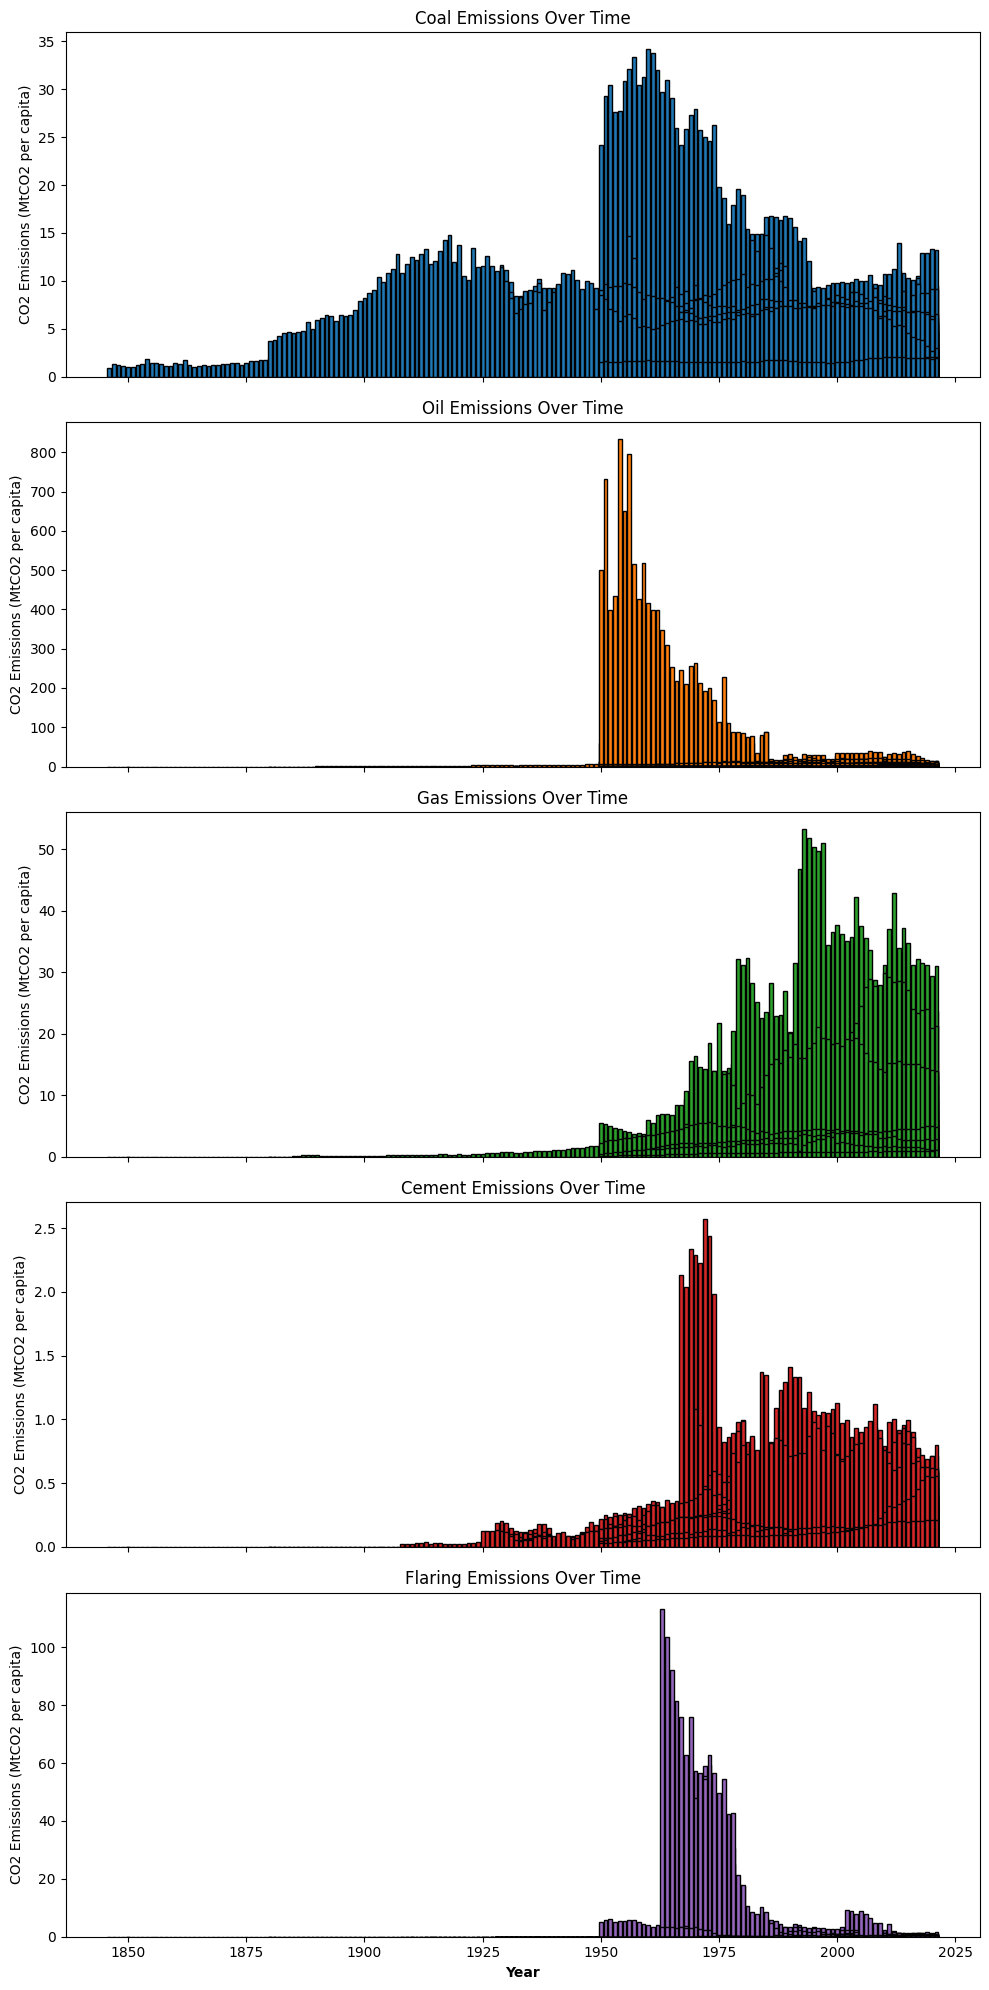

In [26]:
# List of fuel types
fuel_types = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']

# Create subplots
fig, axes = plt.subplots(nrows=len(fuel_types), ncols=1, figsize=(10, 4 * len(fuel_types)), sharex=True)

# Plot individual bar charts for each fuel type
for i, fuel_type in enumerate(fuel_types):
    axes[i].bar(co2pc_df['Year'], co2pc_df[fuel_type], color='C{}'.format(i), edgecolor='black')
    axes[i].set_ylabel('CO2 Emissions (MtCO2 per capita)')
    axes[i].set_title('{} Emissions Over Time'.format(fuel_type))

# Set common xlabel
plt.xlabel('Year', fontweight='bold')

plt.tight_layout()
plt.show()


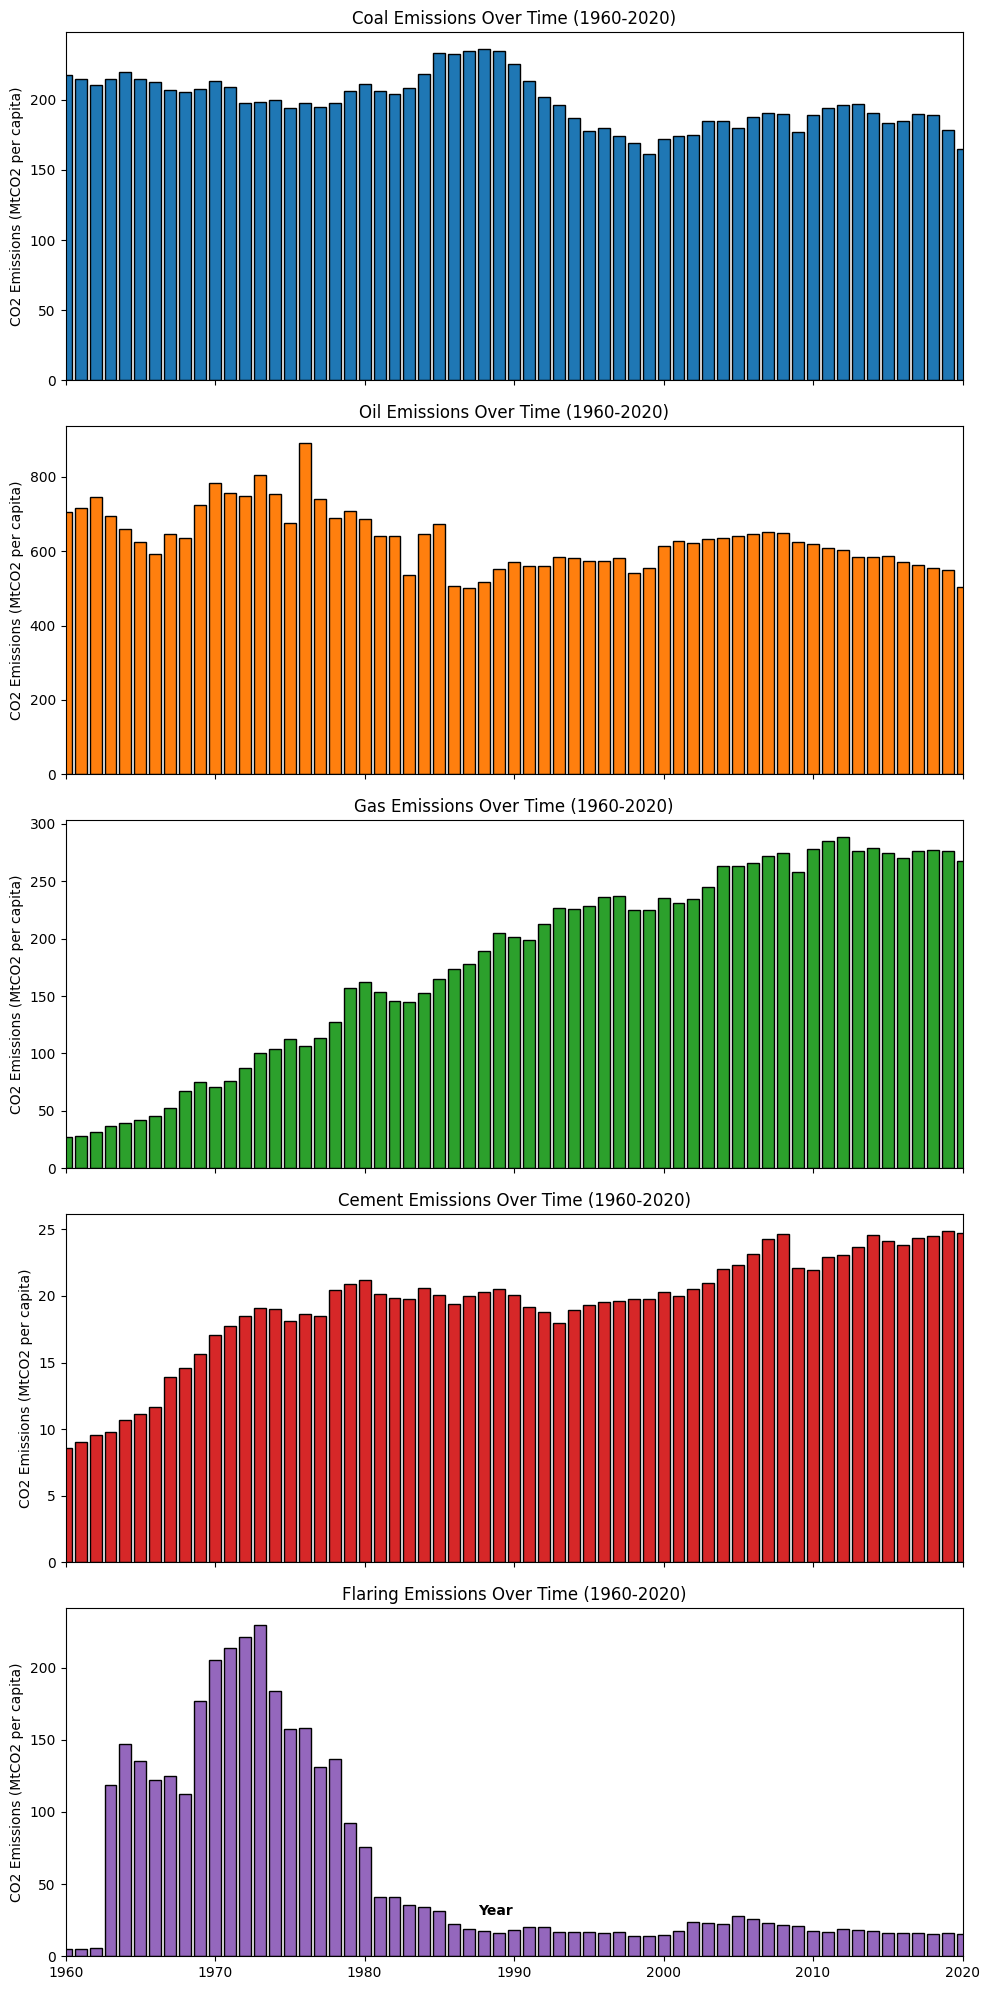

In [27]:
# Filter the DataFrame for the years 1960 to 2020
filtered_df = co2pc_df[(co2pc_df['Year'] >= 1960) & (co2pc_df['Year'] <= 2020)]

# Aggregate emissions by fuel type for each year within the filtered DataFrame
aggregated_df = filtered_df.groupby('Year').sum().reset_index()

# List of fuel types
fuel_types = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']

# Create subplots
fig, axes = plt.subplots(nrows=len(fuel_types), ncols=1, figsize=(10, 4 * len(fuel_types)), sharex=True)

# Plot individual bar charts for each fuel type
for i, fuel_type in enumerate(fuel_types):
    axes[i].bar(aggregated_df['Year'], aggregated_df[fuel_type], color='C{}'.format(i), edgecolor='black')
    axes[i].set_ylabel('CO2 Emissions (MtCO2 per capita)')
    axes[i].set_title('{} Emissions Over Time (1960-2020)'.format(fuel_type))
    axes[i].set_xlim(1960, 2020)  # Ensure the x-axis only shows the range from 1960 to 2020

# Set common xlabel
fig.text(0.5, 0.04, 'Year', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

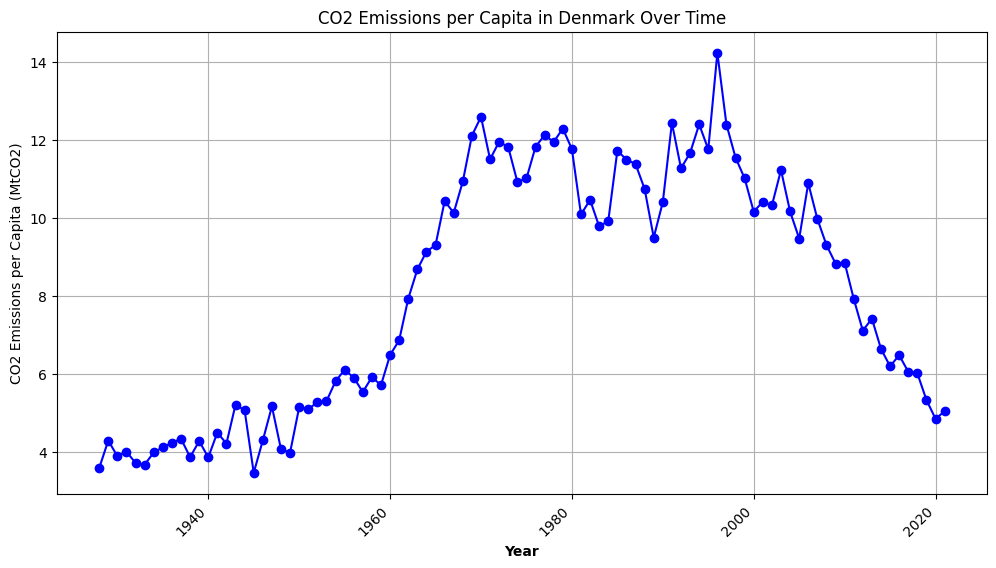

In [28]:
# Filter the DataFrame for Denmark
denmark_df = co2mt_df[co2mt_df['Country'] == 'Denmark']

# Line plot for CO2 emissions per capita in Denmark
plt.figure(figsize=(12, 6))
plt.plot(denmark_df['Year'], denmark_df['Per Capita'], marker='o', color='b')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions per Capita in Denmark Over Time')
plt.ylabel('CO2 Emissions per Capita (MtCO2)')
plt.grid(True)
plt.show()


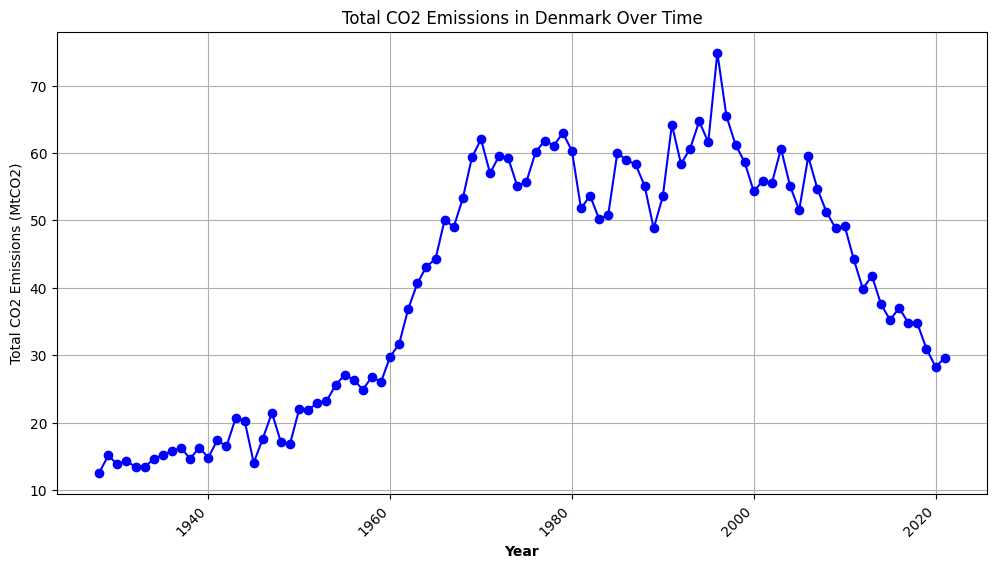

In [29]:
# Filter the DataFrame for Denmark
denmark_mt_df = co2mt_df[co2mt_df['Country'] == 'Denmark']

# Line plot for total CO2 emissions in Denmark
plt.figure(figsize=(12, 6))
plt.plot(denmark_mt_df['Year'], denmark_mt_df['Total'], marker='o', color='b')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Total CO2 Emissions in Denmark Over Time')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.grid(True)
plt.show()

In [30]:
# Display unique values in the 'Country' column
unique_countries = co2mt_df['Country'].unique()
print("Unique Countries in the Dataset:")
print(unique_countries)


Unique Countries in the Dataset:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bonaire, Saint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire"
 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Micronesia (Federated States of)' 'Fiji' 'Finland' 'Panama Canal Zone'
 'France' 'French Guiana'

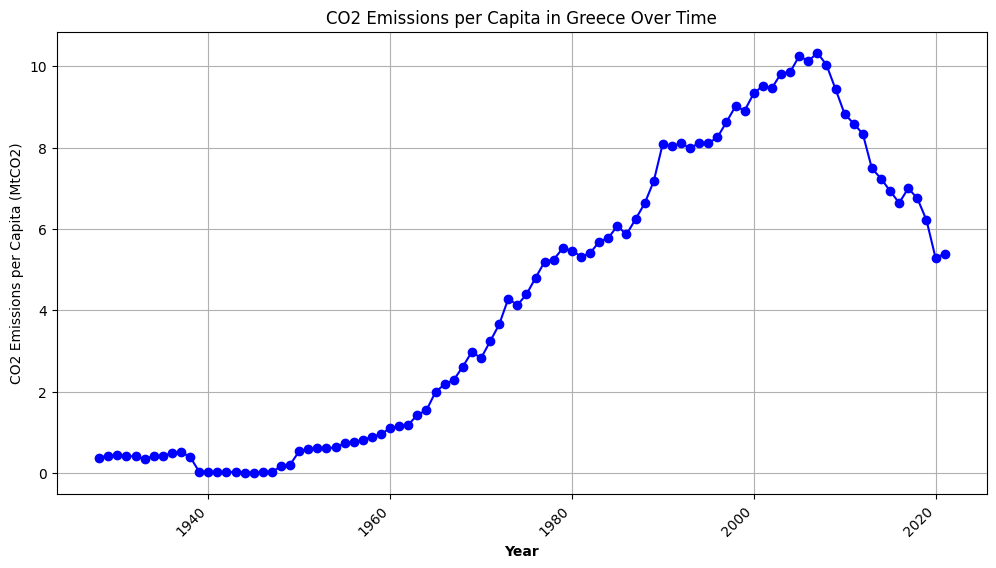

In [31]:
# Filter the DataFrame for Greece
greece_mt_df = co2mt_df[co2mt_df['Country'] == 'Greece']

# Line plot for CO2 emissions per capita in Greece
plt.figure(figsize=(12, 6))
plt.plot(greece_mt_df['Year'], greece_mt_df['Per Capita'], marker='o', color='b')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions per Capita in Greece Over Time')
plt.ylabel('CO2 Emissions per Capita (MtCO2)')
plt.grid(True)
plt.show()

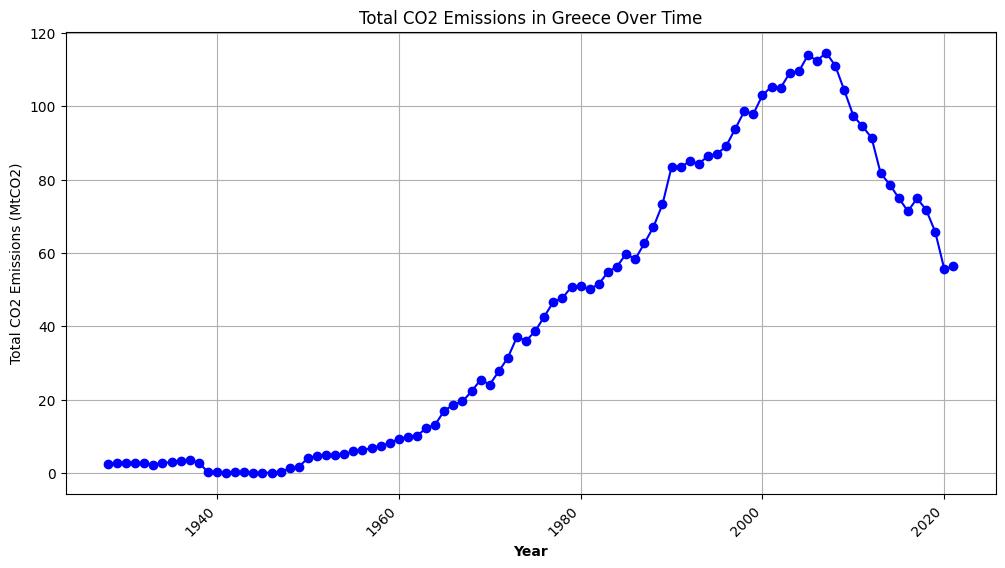

In [32]:
# Filter the DataFrame for Greece
greece_mt_df = co2mt_df[co2mt_df['Country'] == 'Greece']

# Line plot for total CO2 emissions in Greece
plt.figure(figsize=(12, 6))
plt.plot(greece_mt_df['Year'], greece_mt_df['Total'], marker='o', color='b')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Total CO2 Emissions in Greece Over Time')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.grid(True)
plt.show()

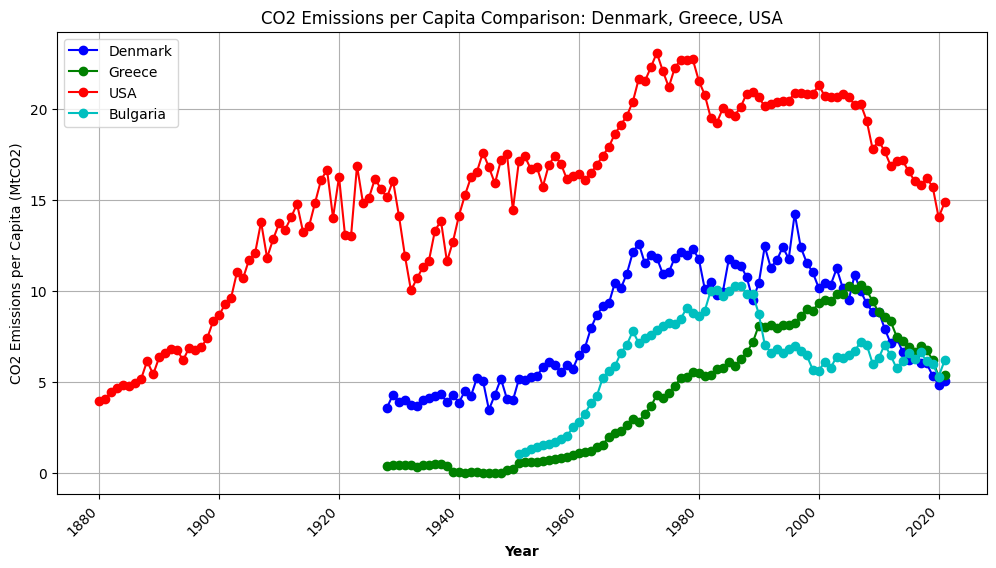

In [33]:
# Filter the DataFrame for Denmark, Greece, and the USA
denmark_pc_df = co2mt_df[co2mt_df['Country'] == 'Denmark']
greece_pc_df = co2mt_df[co2mt_df['Country'] == 'Greece']
usa_pc_df = co2mt_df[co2mt_df['Country'] == 'USA']
bulgaria_pc_df = co2mt_df[co2mt_df['Country'] == 'Bulgaria']

# Line plot for CO2 emissions per capita comparison
plt.figure(figsize=(12, 6))
plt.plot(denmark_pc_df['Year'], denmark_pc_df['Per Capita'], marker='o', label='Denmark', color='b')
plt.plot(greece_pc_df['Year'], greece_pc_df['Per Capita'], marker='o', label='Greece', color='g')
plt.plot(usa_pc_df['Year'], usa_pc_df['Per Capita'], marker='o', label='USA', color='r')
plt.plot(bulgaria_pc_df['Year'], bulgaria_pc_df['Per Capita'], marker='o', label='Bulgaria', color='c')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions per Capita Comparison: Denmark, Greece, USA')
plt.ylabel('CO2 Emissions per Capita (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()

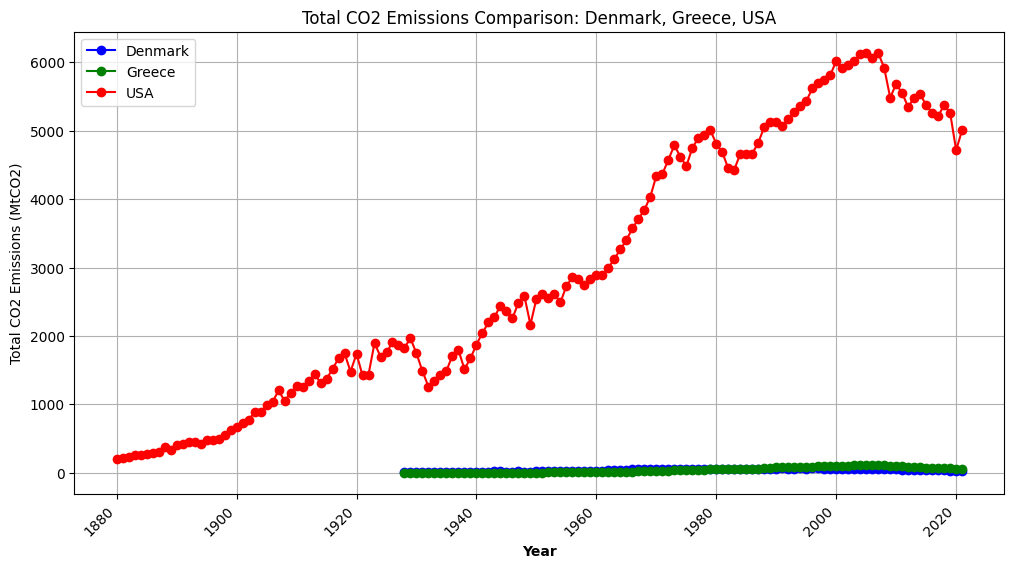

In [34]:
# Filter the DataFrame for Denmark, Greece, and the USA
denmark_mt_df = co2mt_df[co2mt_df['Country'] == 'Denmark']
greece_mt_df = co2mt_df[co2mt_df['Country'] == 'Greece']
usa_mt_df = co2mt_df[co2mt_df['Country'] == 'USA']

# Line plot for total CO2 emissions comparison
plt.figure(figsize=(12, 6))
plt.plot(denmark_mt_df['Year'], denmark_mt_df['Total'], marker='o', label='Denmark', color='b')
plt.plot(greece_mt_df['Year'], greece_mt_df['Total'], marker='o', label='Greece', color='g')
plt.plot(usa_mt_df['Year'], usa_mt_df['Total'], marker='o', label='USA', color='r')

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Total CO2 Emissions Comparison: Denmark, Greece, USA')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()


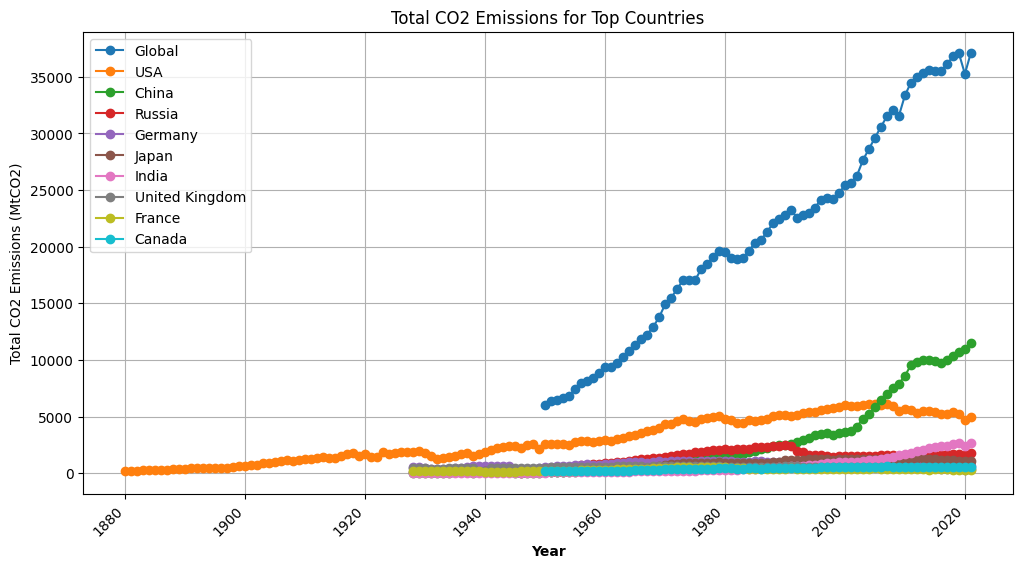

In [35]:
# Aggregate data by summing total CO2 emissions for each country
total_emissions_by_country = co2mt_df.groupby('Country')['Total'].sum()

# Select the top N countries with the highest total emissions
top_countries = total_emissions_by_country.nlargest(10)  # Change 10 to the desired number of countries

# Filter the original DataFrame for the selected top countries
top_countries_df = co2mt_df[co2mt_df['Country'].isin(top_countries.index)]

# Line plot for total CO2 emissions for the top countries
plt.figure(figsize=(12, 6))
for country in top_countries.index:
    country_data = top_countries_df[top_countries_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total'], marker='o', label=country)

plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Total CO2 Emissions for Top Countries')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()

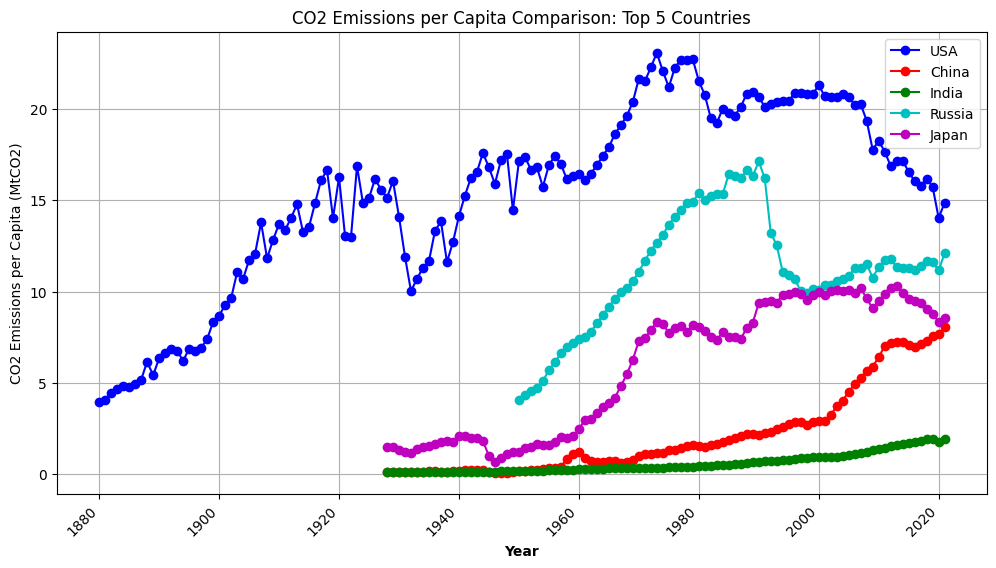

In [36]:
# Filter the DataFrame for the USA and China
usa_pc_df = co2mt_df[co2mt_df['Country'] == 'USA']
china_pc_df = co2mt_df[co2mt_df['Country'] == 'China']
india_pc_df = co2mt_df[co2mt_df['Country'] == 'India']
russia_pc_df = co2mt_df[co2mt_df['Country'] == 'Russia']
japan_pc_df = co2mt_df[co2mt_df['Country'] == 'Japan']

# Line plot for CO2 emissions per capita comparison between the USA and China
plt.figure(figsize=(12, 6))
plt.plot(usa_pc_df['Year'], usa_pc_df['Per Capita'], marker='o', label='USA', color='b')
plt.plot(china_pc_df['Year'], china_pc_df['Per Capita'], marker='o', label='China', color='r')
plt.plot(india_pc_df['Year'], india_pc_df['Per Capita'], marker='o', label='India', color='g')
plt.plot(russia_pc_df['Year'], russia_pc_df['Per Capita'], marker='o', label='Russia', color='c')
plt.plot(japan_pc_df['Year'], japan_pc_df['Per Capita'], marker='o', label='Japan', color='m')


plt.xlabel('Year', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions per Capita Comparison: Top 5 Countries')
plt.ylabel('CO2 Emissions per Capita (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Group by country and find the minimum year for each
min_years_by_country = co2pc_df.groupby('Country')['Year'].min()

# Filter countries with data before 1990
countries_with_early_data = min_years_by_country[min_years_by_country <= 1989].index

# Print the list of countries
print("Countries with Data from 1989 and Before:")
print(countries_with_early_data)


Countries with Data from 1989 and Before:
Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=204)


In [38]:
# Display data types of each column
print(co2pc_df.dtypes)


Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
dtype: object


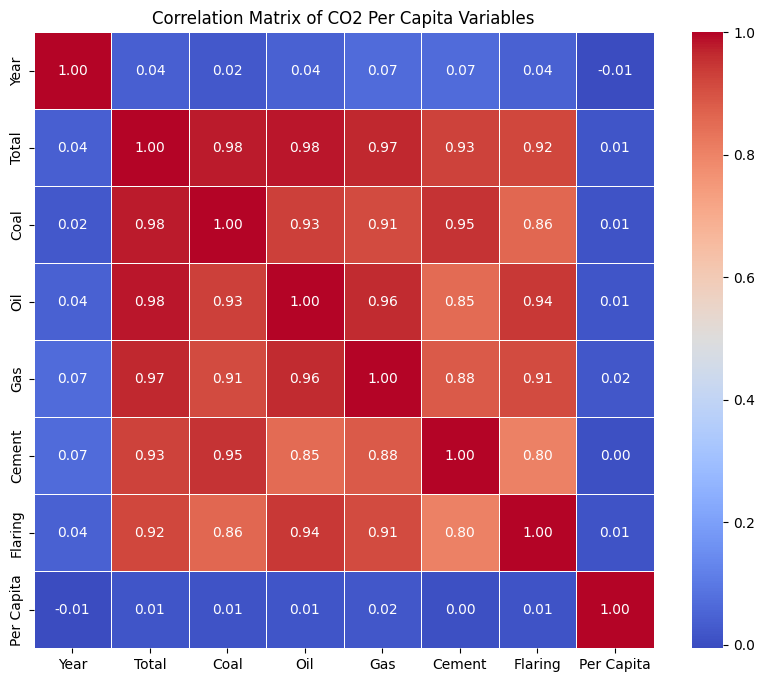

In [39]:
# Select relevant numeric columns for correlation analysis
numeric_columns = ['Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']

# Create a correlation matrix
correlation_matrix = co2mt_df[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of CO2 Per Capita Variables')
plt.show()

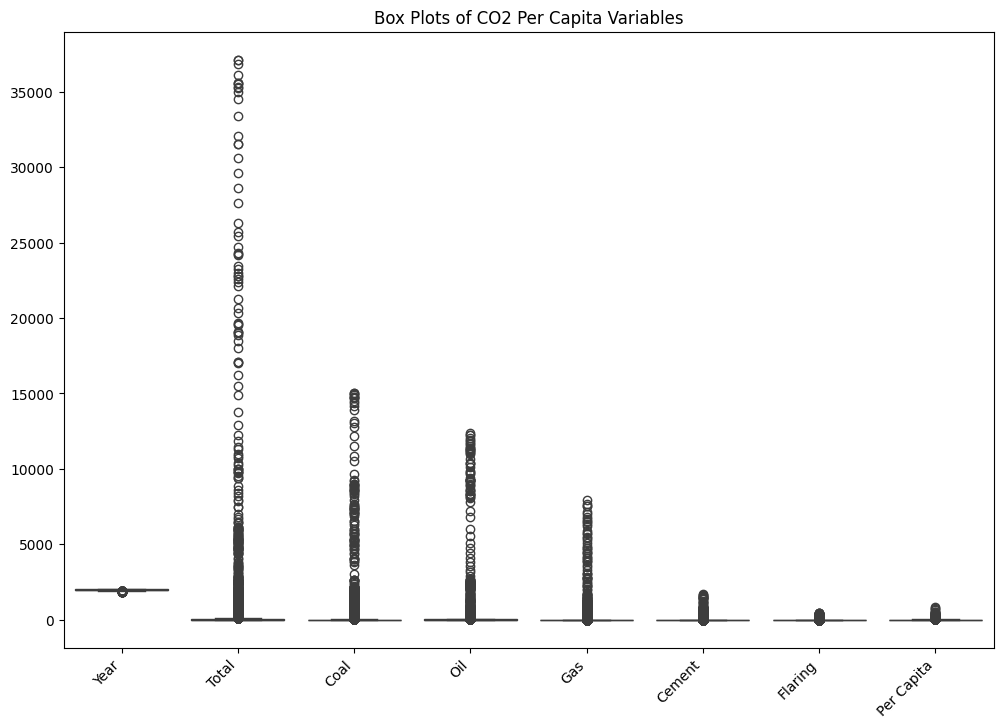

In [40]:
# Create box plots for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=co2mt_df[numeric_columns])
plt.title('Box Plots of CO2 Per Capita Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

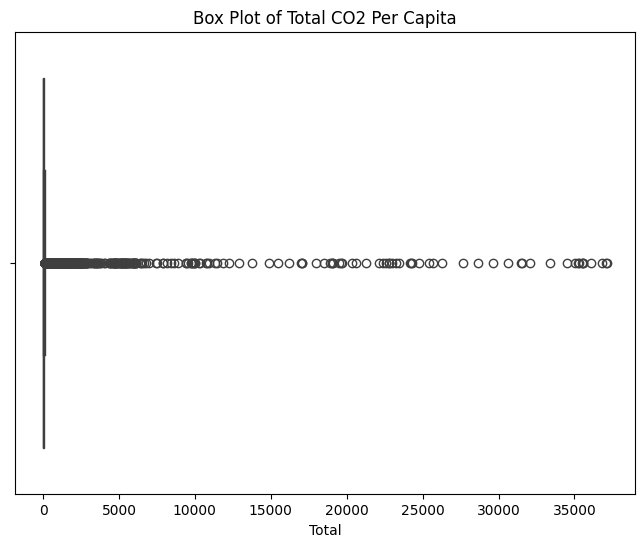

In [41]:
# Create a box plot for the 'Total' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=co2mt_df['Total'])
plt.title('Box Plot of Total CO2 Per Capita')
plt.show()

In [42]:
co2mt_df_filtered = co2mt_df[co2mt_df['Year'] >= 1950]

global_total_per_year = co2mt_df_filtered.groupby('Year')['Total'].sum().reset_index()

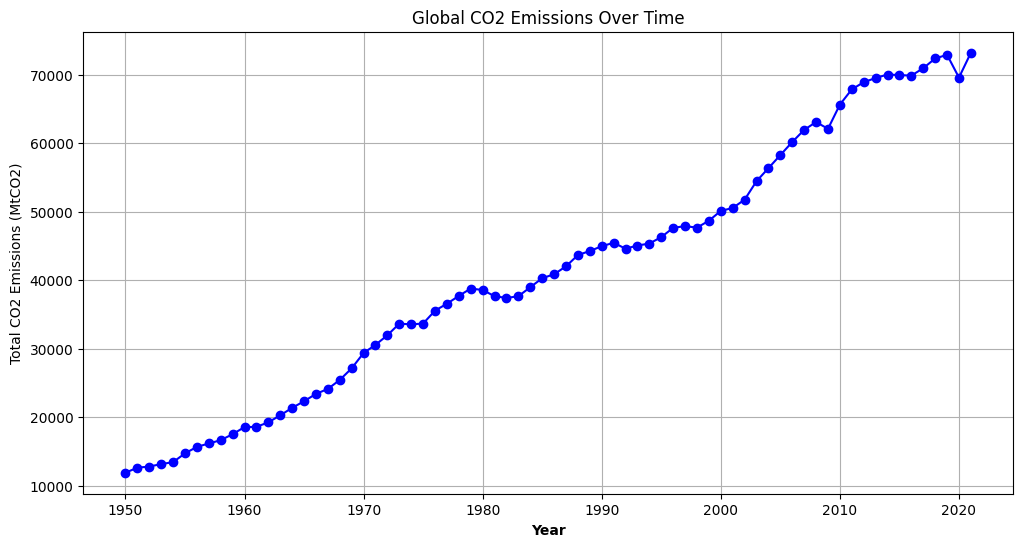

In [43]:
# Global emissions
plt.figure(figsize=(12, 6))
plt.plot(global_total_per_year['Year'], global_total_per_year['Total'], marker='o', color='b')
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total CO2 Emissions (MtCO2)')
plt.grid(True)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [45]:
#Supervised
features = ['Year', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']
target = 'Total'

In [46]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(co2mt_df, test_size=0.2, random_state=42)


In [47]:
# Separate features and target variable in the training set
X_train = train_data[features]
y_train = train_data[target]

In [48]:
# Separate features and target variable in the testing set
X_test = test_data[features]
y_test = test_data[target]

In [49]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Save the trained model to a file
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)
print(f'Trained model saved to {model_filename}')

Trained model saved to linear_regression_model.joblib


In [51]:
# Predictions on the test set
predictions = model.predict(X_test)

In [52]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 11.097634713207379


In [53]:
#Calculate R-squared (R²) metric
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.9999951685678031


In [91]:
#Unsupervised

In [92]:
from sklearn.cluster import KMeans

In [93]:
# Choose the number of clusters (e.g., 3 for demonstration)
num_clusters = 3


In [110]:
# Select features for clustering (modify as needed)
clustering_features = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring']


In [111]:
# Fit K-means clustering model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
co2mt_df['Cluster'] = kmeans_model.fit_predict(co2mt_df[clustering_features])

In [112]:
from sklearn.metrics import silhouette_score
# Calculate silhouette score
silhouette_avg = silhouette_score(co2mt_df[clustering_features], co2mt_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.9737347824887158


In [113]:
# Silhouette Score
# 0.71-1.0: A strong structure has been found.
# 0.51-0.70: A reasonable structure has been found.
# 0.26-0.50: The structure is weak and could be artificial.
# < 0.25: No substantial structure has been found.


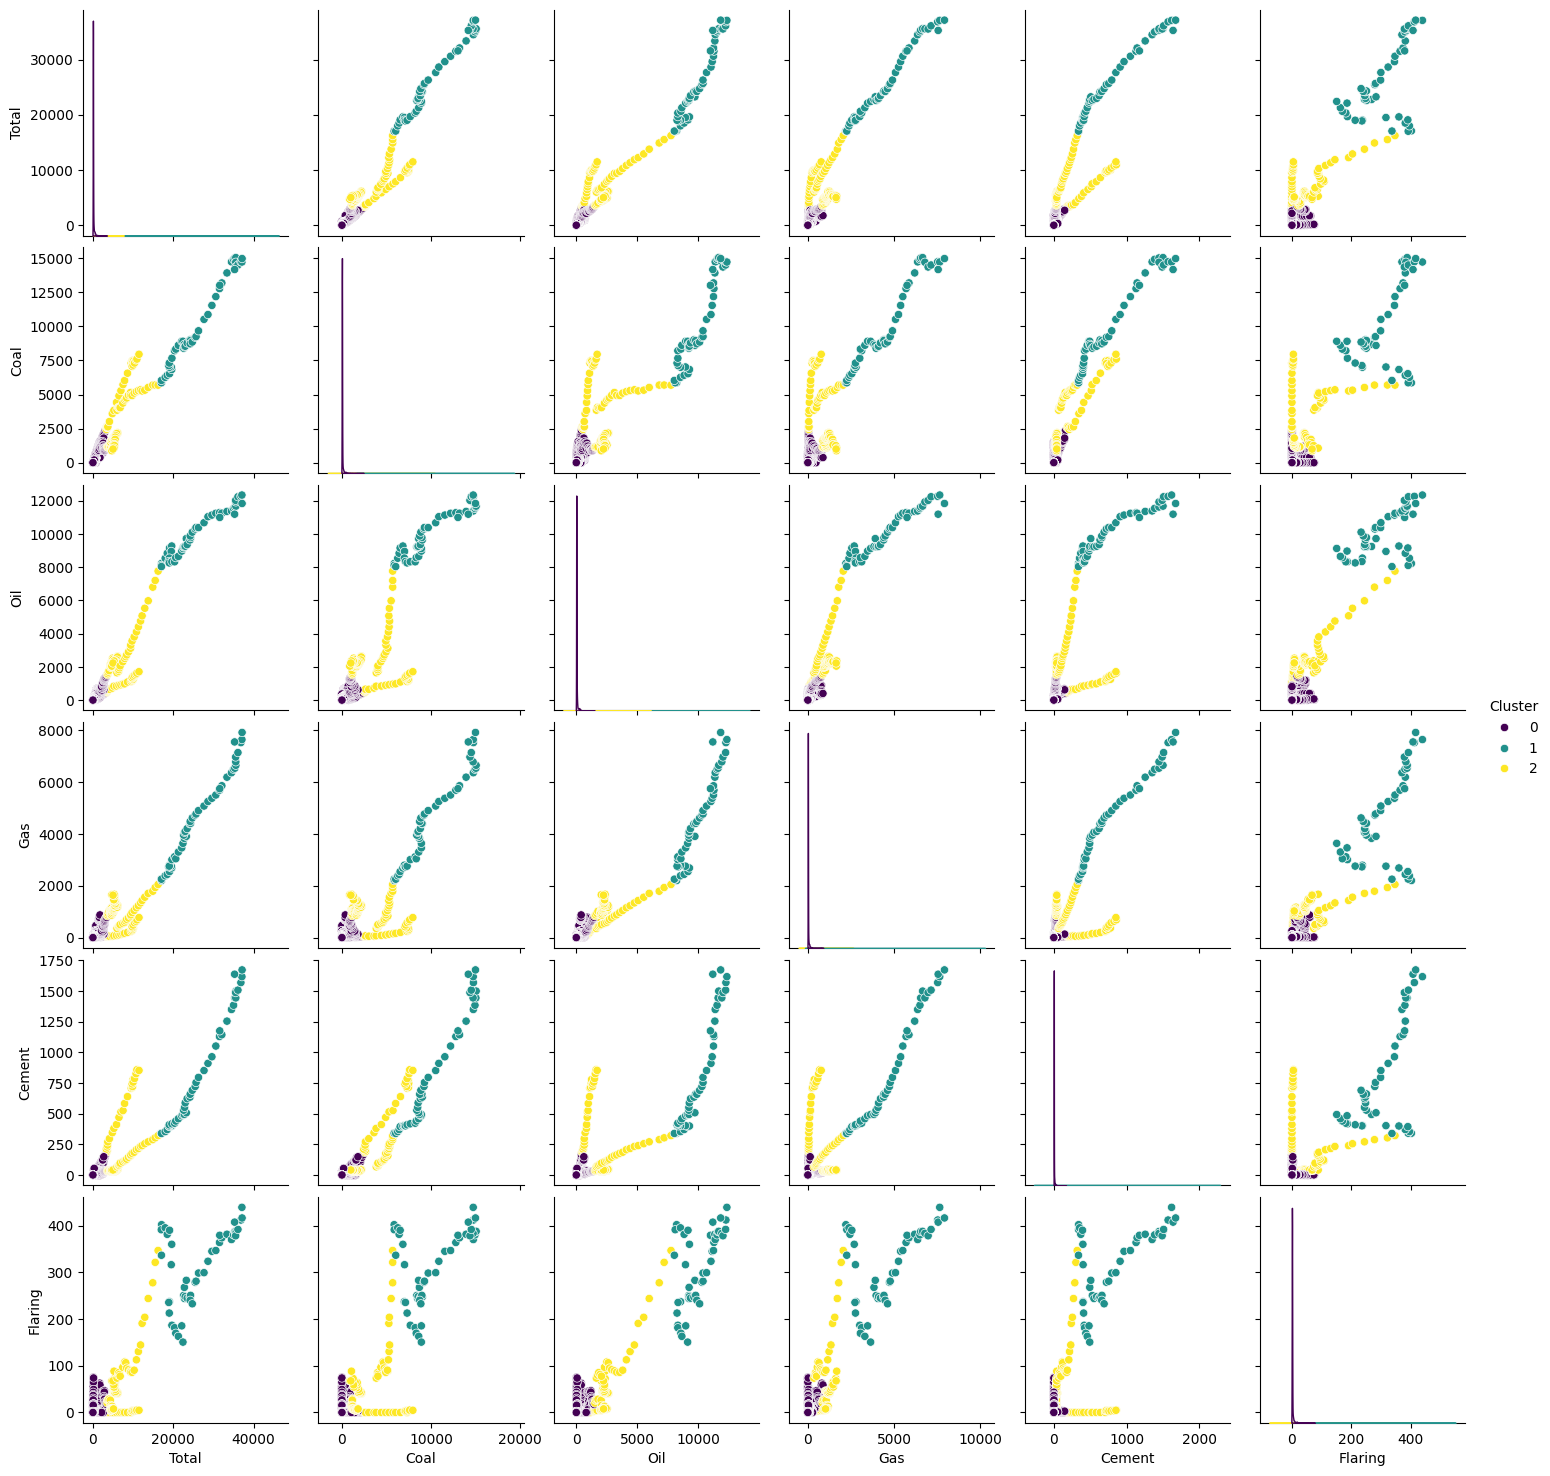

In [114]:
# Visualize cluster assignments
sns.pairplot(co2mt_df, hue='Cluster', vars=clustering_features, palette='viridis')
plt.show()

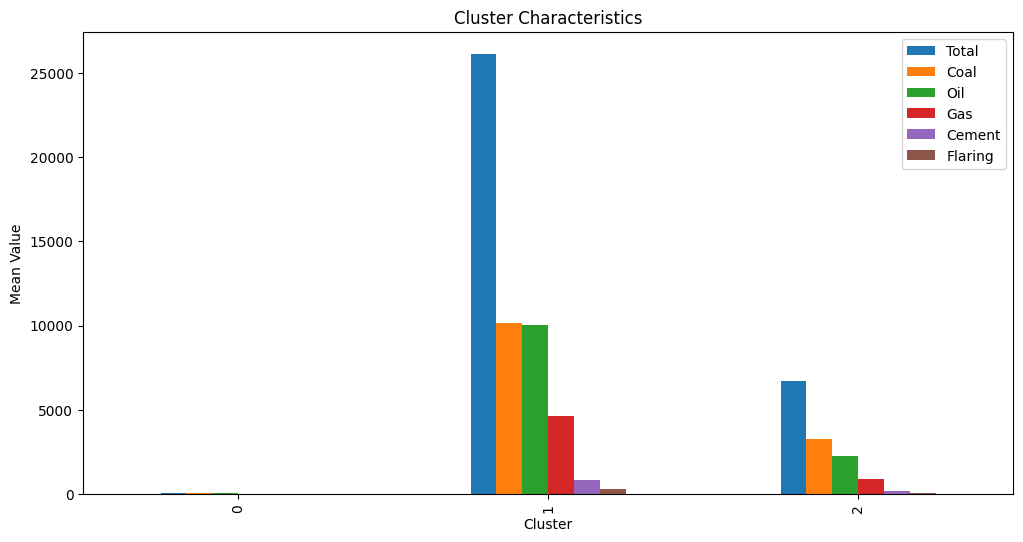

In [115]:
# Analyze Cluster Characteristics
cluster_means = co2mt_df.groupby('Cluster')[clustering_features].mean()
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()


In [116]:
# Identify cluster assigments 
cluster_assignments = co2pc_df['Cluster']

In [117]:
# Replace 'Cluster' with our actual column name
cluster_0_data = co2pc_df[co2pc_df['Cluster'] == 0]
cluster_1_data = co2pc_df[co2pc_df['Cluster'] == 1]
cluster_2_data = co2pc_df[co2pc_df['Cluster'] == 2]


In [118]:
# Replace 'Feature1', 'Feature2', etc. with our actual feature names
features_of_interest = ['Total', 'Coal', 'Oil']

In [119]:
# Display mean values of features for each cluster
mean_values_by_cluster = co2mt_df.groupby('Cluster')[features_of_interest].mean()
print(mean_values_by_cluster)

                Total          Coal           Oil
Cluster                                          
0           73.198093     31.479836     26.425001
1        26136.817596  10166.545851  10039.325806
2         6728.077750   3269.286589   2269.490432


In [120]:
cluster_counts = co2mt_df['Cluster'].value_counts()

# Display the count of countries in each cluster
print("Number of Countries in Each Cluster:")
print(cluster_counts)

Number of Countries in Each Cluster:
Cluster
0    15159
2      106
1       49
Name: count, dtype: int64


In [121]:
cluster_1_countries = co2pc_df[co2pc_df['Cluster'] == 1]

In [122]:
cluster_1_countries = co2pc_df[(co2pc_df['Cluster'] == 1) & (co2pc_df['Country'] != 'Global')]

In [123]:
# Display the countries in clusters
for cluster_id in co2pc_df['Cluster'].unique():
    cluster_countries = co2pc_df[co2pc_df['Cluster'] == cluster_id]['Country'].unique()
    print(f"Cluster {cluster_id} Countries: {cluster_countries}")

Cluster 0 Countries: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bonaire, Saint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba'
 'Curaçao' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Micronesia (Federated States of)' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana